In [ ]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os #This module provides a portable way of using operating system dependent functionality. Like open() for file reading and writing, for paths manipulation,
import sys #interacts with pyrhin interperter for accessing command line arguments
from tempfile import NamedTemporaryFile #This module creates temporary files and directories. It works on all supported platforms. All the user-callable functions and constructors take additional arguments which allow direct control over the location and name of temporary files and directories. creates and returns temp file. recovery, and tracking changes
from urllib.request import urlopen #opens urls, for HTTPs control such as cookies and authentication and proxies. retrieves data from the internet.
from urllib.parse import unquote, urlparse #This module defines a standard interface to break Uniform Resource Locator (URL) strings up in components (addressing scheme, network location, path etc.), to combine the components back into a URL string
from urllib.error import HTTPError #defines the exception classes for exceptions raised by urllib.request. handles http errors
from zipfile import ZipFile #This module provides tools to create, read, write, append, and list a ZIP file.
import tarfile #can create, extract, and manipulate TAR archives.
import shutil #this allows you to access the functionality provided by the shutil module provided by the module to perform tasks such as copying, moving, renaming, and deleting files and directories, as well as handling archives, managing file permissions, and working with temporary files

CHUNK_SIZE = 40960 #determine the numbers of row to read from the requested file
DATA_SOURCE_MAPPING = 'https://drive.google.com/drive/folders/1D9C77Pp60pCy2cg4N_tJpObFigOyPNTO'
#opens kaggle

GDRIVE_INPUT_PATH='/gdrive/MyDrive/ColabNotebooks/KaggleDataset' #opens kaggle input section for the dataset
GDRIVE_WORKING_PATH='/gdrive/MyDrive/ColabNotebooks/KaggleDataset/Dataset' #is a default starting directory that contains the notebook and all submission files
Gdrive_SYMLINK='gdrive' #to point to a file or directory by specifying a path

!umount /kaggle/input/ 2> /dev/null #saves the errors
shutil.rmtree('/gdrive/MyDrive/ColabNotebooks/KaggleDataset', ignore_errors=True) #Delete an entire directory tree; path must point to a directory. If ignore_errors is true, errors resulting from failed removals will be ignored;
os.makedirs(GDRIVE_INPUT_PATH, 0o777, exist_ok=True) #creates a directory if it's missing
os.makedirs(GDRIVE_WORKING_PATH, 0o777, exist_ok=True) #same

try:
  os.symlink(GDRIVE_INPUT_PATH, os.path.join("..", 'KaggleDataset'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(GDRIVE_WORKING_PATH, os.path.join("..", 'Dataset'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','): #fetches images dataset from the input directory and uncompress the zip compression for "plant-dataset"
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(GDRIVE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

ValueError: unknown url type: '//drive.google.com/drive/folders/1D9C77Pp60pCy2cg4N_tJpObFigOyPNTO'

In [ ]:
import os
import numpy as np #works with arrays and matrcies using linear algebra
import pandas as pd #works with datasets, analyzing, cleaning, exploring and manpulating data
import pickle #module for serializing and de-serializing Python objects, to convert object to string and vice versa
import cv2 #library for computer vision, machine learning, and image processing
from os import listdir #Return a list containing the names of the entries in the directory given by path
import tensorflow as tf #open source framework for creating and deploying ML models in any environment.
from sklearn.preprocessing import LabelBinarizer #converts string into binary
from tensorflow.keras.models import Sequential #default API for TensorFlow users to solve machine learning problems with modern deep learning. A model grouping layers into an object with training/inference features. execute operations one after another
from tensorflow.keras.layers import BatchNormalization #the base class of all Keras layers, to create and customize stateful and stateless computations for TensorFlow models for predictions
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Activation, Flatten, Dropout, Dense
from tensorflow.keras import backend as K
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import img_to_array
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [ ]:
# Load the Drive helper and mount
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

#sys.path.append('/gdrive/drive/gdrive/MyDrive/ColabNotebooks/KaggleDataset/Dataset')
sys.path.insert(0,'/content/gdrive/drive/gdrive/MyDrive/ColabNotebooks/KaggleDataset/Dataset')

print('Data source import complete.')
base_dir = '/content/gdrive/drive/gdrive/MyDrive/ColabNotebooks/KaggleDataset/Dataset'  #directory given by path, has 12 classes/folders with dataset images
leaf_classs = os.listdir(base_dir) #saves enteries (folder titles) into this variable as an array
leaf_classs

Mounted at /content/gdrive
Data source import complete.


FileNotFoundError: [Errno 2] No such file or directory: '/content/gdrive/drive/gdrive/MyDrive/ColabNotebooks/KaggleDataset/Dataset'

In [ ]:
leaf_classs = os.listdir(base_dir) #saves enteries (folder titles) into this variable as an array
leaf_classs

FileNotFoundError: [Errno 2] No such file or directory: '/content/gdrive/drive/gdrive/MyDrive/ColabNotebooks/KaggleDataset/Dataset'

In [ ]:
print("Total Plant classes are: {}".format(len(leaf_classs))) #the number of folders inside the directory

Total Plant classes are: 3


In [ ]:
 #counts number of images in each folder
 nums = {}
for plant in leaf_classs:
    nums[plant] = len(os.listdir(base_dir + '/' + plant))

# converting the nums dictionary to pandas dataframe passing index as plant name and number of images as column. draws them as a table.

img_per_class = pd.DataFrame(nums.values(), index=nums.keys(), columns=["no. of images"])
img_per_class

TypeError: unsupported operand type(s) for +: 'NoneType' and 'str'

In [ ]:
from tensorflow import keras #imports keras API
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img

In [ ]:
train_gen=ImageDataGenerator(rescale=1./255,validation_split=0.2) #1. means float values upto 255 pixels. image scale limit. biggest size allowed for an image
train_data=train_gen.flow_from_directory('/kaggle/input/plant-dataset/Dataset/',target_size=(64,64)
                                         ,batch_size=32,class_mode='categorical',shuffle=True,subset='training') #32 training instance in each batch, meaning object or class.

Found 22295 images belonging to 12 classes.


In [ ]:
test_data=train_gen.flow_from_directory('/kaggle/input/plant-dataset/Dataset/',target_size=(64,64),
                                        batch_size=1,shuffle=False,subset='validation') #remaining images used for validation

Found 5571 images belonging to 12 classes.


In [ ]:
train_data.classes #the folders image batches. each number corresponds to the folder/class the image is from.

array([ 0,  0,  0, ..., 11, 11, 11], dtype=int32)

In [ ]:
train_data.class_indices #gave the folders indicies and saved them into an array. each time it sees an object from a class it will recognize which class. each folder title corresponds to an index.

{'Apple___healthy': 0,
 'Blueberry___healthy': 1,
 'Cherry_(including_sour)___healthy': 2,
 'Corn_(maize)___healthy': 3,
 'Grape___healthy': 4,
 'Peach___healthy': 5,
 'Pepper,_bell___healthy': 6,
 'Potato___healthy': 7,
 'Raspberry___healthy': 8,
 'Soybean___healthy': 9,
 'Strawberry___healthy': 10,
 'Tomato___healthy': 11}

In [ ]:
EPOCHS = 40 #changed from 200 to 40 just to run faster to see what would happen after the "model.fit_generator" block, error occures after reaching EPOCHS=47
INIT_LR = 1e-3 #default value for the initial learning rate
BS = 32 #passing batches of images into the network for training
default_image_size = tuple((256, 256)) #width * height for sequare image
image_size = 0
directory_root = '../input/plantvillage/' #private dataset
width=256
height=256
depth=3 #focus, clearity of image

"""
An epoch is a complete iteration through the entire training dataset in one cycle for training the machine learning model. During an epoch, Every training sample in the dataset is processed by the model, and its weights and biases are updated in accordance with the computed loss or error.

In deep learning, the training dataset is generally divided into smaller groups called batches, and during each epoch, the model analyzes each batch in sequence, one at a time. The number of batches in an epoch is determined by the batch size, which is a hyperparameter that can be tuned to optimize the performance of the model. After each epoch, the model performance can be evaluated on the validation dataset. This helps to monitor the progress of the model.
"""

In [ ]:
#function made to read images using openCV and convert it to an array to represent the image as pixels

from tensorflow.keras.preprocessing.image import img_to_array
#function definition and body
def convert_image_to_array(image_dir):
    try:
        image = cv2.imread(image_dir) #saves the reading of the image from the directory into a variable
        if image is not None : #if image exists
            image = cv2.resize(image, default_image_size) #change size
            return img_to_array(image) #converts image to an array
        else :
            return np.array([])
    except Exception as e:
        print(f"Error : {e}")
        return None

In [ ]:
#converts images to matrices using the above function for training the model

image_list, label_list = [], [] #array creation
try:
    print("[INFO] Loading images ...")
    root_dir = os.listdir(base_dir) #private dataset
    print(root_dir) #print folder names

    for plant_folder in root_dir : #
        print(f"[INFO] Processing {plant_folder} ...")
        plant_disease_image_list = os.listdir(base_dir + plant_folder)
        #print(plant_image_folder_list)

#returns the names of the folders there, choosing healthy plants only
        for image in plant_disease_image_list[:200]:
            image_directory = f"{base_dir}/{plant_folder}/{image}"
            if image_directory.endswith(".jpg") == True or image_directory.endswith(".JPG") == True:
                image_list.append(convert_image_to_array(image_directory)) #used the function above to retrieve these
                label_list.append(plant_folder)

    print("[INFO] Image loading completed")
except Exception as e:
    print(f"Error : {e}")

[INFO] Loading images ...
['Grape___healthy', 'Potato___healthy', 'Soybean___healthy', 'Blueberry___healthy', 'Peach___healthy', 'Tomato___healthy', 'Pepper,_bell___healthy', 'Corn_(maize)___healthy', 'Raspberry___healthy', 'Apple___healthy', 'Cherry_(including_sour)___healthy', 'Strawberry___healthy']
[INFO] Processing Grape___healthy ...
[INFO] Processing Potato___healthy ...
[INFO] Processing Soybean___healthy ...
[INFO] Processing Blueberry___healthy ...
[INFO] Processing Peach___healthy ...
[INFO] Processing Tomato___healthy ...
[INFO] Processing Pepper,_bell___healthy ...
[INFO] Processing Corn_(maize)___healthy ...
[INFO] Processing Raspberry___healthy ...
[INFO] Processing Apple___healthy ...
[INFO] Processing Cherry_(including_sour)___healthy ...
[INFO] Processing Strawberry___healthy ...
[INFO] Image loading completed


In [ ]:
image_size = len(image_list) #passes the matrices above to the function, for a length of an object, then saves it in the image size variable. getting 2400 images that match the conditions.

In [ ]:
image_size

2400

In [ ]:
#corresponds images to the title of their respective folders, labeling the object in the image with the folder title as its class. to recognize the object in the image as the label/class.

label_binarizer = LabelBinarizer() #At learning time, this simply consists in learning one regressor or binary classifier per class. In doing so, one needs to convert multi-class labels to binary labels (belong or does not belong to the class). LabelBinarizer makes this process easy with the transform method.
image_labels = label_binarizer.fit_transform(label_list) #passes folder titles to the function to add them to an array as labels
pickle.dump(label_binarizer,open('label_transform.pkl', 'wb')) #opens file in binary format and writes in it
n_classes = len(label_binarizer.classes_) #length the same as the classes number

In [ ]:
/print(label_binarizer.classes_)

['Apple___healthy' 'Blueberry___healthy'
 'Cherry_(including_sour)___healthy' 'Corn_(maize)___healthy'
 'Grape___healthy' 'Peach___healthy' 'Pepper,_bell___healthy'
 'Potato___healthy' 'Raspberry___healthy' 'Soybean___healthy'
 'Strawberry___healthy' 'Tomato___healthy']


In [ ]:
np_image_list = np.array(image_list, dtype=np.float16) / 225.0 #changing pixels into numbers between 0 and 1. reducing size in memory.

In [ ]:
np_image_list #image quality and size in memory

array([[[[0.      , 0.      , 0.03555 ],
         [0.      , 0.      , 0.03555 ],
         [0.      , 0.      , 0.03555 ],
         ...,
         [0.      , 0.      , 0.03111 ],
         [0.      , 0.      , 0.03111 ],
         [0.      , 0.      , 0.03111 ]],

        [[0.8535  , 0.8623  , 0.911   ],
         [0.8535  , 0.8623  , 0.911   ],
         [0.858   , 0.8667  , 0.9155  ],
         ...,
         [0.9556  , 0.96    , 1.005   ],
         [0.951   , 0.9556  , 1.      ],
         [0.933   , 0.938   , 0.9824  ]],

        [[0.844   , 0.8535  , 0.9023  ],
         [0.844   , 0.8535  , 0.9023  ],
         [0.849   , 0.858   , 0.9067  ],
         ...,
         [0.9287  , 0.933   , 0.9775  ],
         [0.92    , 0.9243  , 0.9688  ],
         [0.898   , 0.9023  , 0.947   ]],

        ...,

        [[0.8267  , 0.831   , 0.8936  ],
         [0.782   , 0.7866  , 0.849   ],
         [0.849   , 0.8535  , 0.9155  ],
         ...,
         [0.8667  , 0.8623  , 0.9067  ],
         [0.9067  , 0.

In [ ]:
image_labels #turns labels/classes into vectors

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 1, 0]])

In [ ]:
from sklearn.model_selection import train_test_split #split your dataset into subsets that minimize the potential for bias in your evaluation and validation process.
print("[INFO] Spliting data to train, test")
#x for oject to be identified in image, y for class labels
x_train, x_test_temp, y_train, y_test_temp = train_test_split(np_image_list, image_labels, test_size=0.2, random_state = 42) #x 2D array, y 1D array. test size=20% of the images. control randomization

[INFO] Spliting data to train, test


In [ ]:
print("[INFO] Spliting data to test, valid")
x_valid, x_test, y_valid, y_test = train_test_split(x_test_temp, y_test_temp, test_size=0.5, random_state = 42) #same but 50%. ensure test result is correct.

[INFO] Spliting data to test, valid


In [ ]:
x_train.shape , x_test.shape , x_valid.shape #it is a tuple of integers that describe how many dimensions the tensor has along each axis. number of images, length, width, depth

((1920, 256, 256, 3), (240, 256, 256, 3), (240, 256, 256, 3))

In [ ]:
#change image direction and angle
aug = ImageDataGenerator(
    rotation_range=25, width_shift_range=0.1,
    height_shift_range=0.1, shear_range=0.2,
    zoom_range=0.2,horizontal_flip=True,
    fill_mode="nearest")

In [ ]:
#A Sequential model is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor. a tensor is a list of lists.
#conv layer learn specific features to differntiate objects, such as color, image depth and volume, shape, space and so on
#actviatio layers follow conv layers, take input and then output the positive values as is, and turn negative values into 0. to reduce nonlinearity.
#ReLu neurons can indeed effectively ignore some input values. This is a good thing. The neurons are coupled to the inputs via trained weights, so some inputs are ignored by some neurons and other inputs are ignored by other neurons. It allows weights in the subsequent layers to focus on interesting subsets of your input space
#pool layers resizes the input and exists between each conv layer and the next conv layer
#brachnormalize layer are used to normalize the activations of a given input volume before passing it into the next layer in the network. reducing the number of epochs it takes to train a neural network. Batch normalization also has the added benefit of helping “stabilize” training, allowing for a larger variety of learning rates and regularization strengths.
#dropout layer, a form of regularization that aims to help prevent overfitting by increasing testing accuracy, at the expense of training accuracy. For each mini-batch in our training set, dropout layers, with probability p, randomly disconnect inputs from the preceding layer to the next layer in the network architecture.
#dropout layer  Randomly dropping connections ensures that no single node in the network is responsible for “activating” when presented with a given pattern. Instead, dropout ensures there are multiple, redundant nodes that will activate when presented with similar inputs — this, in turn, helps our model to generalize.
#The dense layer is a neural network layer that is connected deeply, which means each neuron in the dense layer receives input from all neurons of its previous layer.
#The output generated by the dense layer is an ‘m’ dimensional vector. Thus, dense layer is basically used for changing the dimensions of the vector. Dense layers also applies operations like rotation, scaling, translation on the vector.
#flatten our pooled feature map into a column like in the image below. The reason we do this is that we're going to need to insert this data into an artificial neural network later on.

model = Sequential()
inputShape = (height, width, depth)
chanDim = -1
if K.image_data_format() == "channels_first":
    inputShape = (depth, height, width)
    chanDim = 1
model.add(Conv2D(32, (3, 3), padding="same",input_shape=inputShape))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(3, 3)))
#model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(Conv2D(128, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(1024))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Dense(n_classes))
model.add(Activation("softmax"))

In [ ]:
model.summary() #summary of the above block

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 32)      896       
                                                                 
 activation (Activation)     (None, 256, 256, 32)      0         
                                                                 
 batch_normalization (Batch  (None, 256, 256, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 85, 85, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 85, 85, 64)        18496     
                                                                 
 activation_1 (Activation)   (None, 85, 85, 64)        0

In [ ]:
#An optimizer is one of the two arguments required for compiling a Keras model. Adam is an optimizer. helps in tuning the parameters of a model to minimize the loss function. loss function which tell us how much the predicted output of the model differs from the actual output.
opt = Adam(learning_rate=INIT_LR/ EPOCHS) #1e-3/40, train test validate for 40 cycles
# distribution
model.compile(loss="binary_crossentropy", optimizer=opt,metrics=["accuracy"]) #combile the model with the layers and the optimizer defined above to begin training
# train the network
print("[INFO] training network...")

[INFO] training network...


In [ ]:
#fit_generator supports augumentation. images are given to model to train by associating pictures/objects with labels, and validate.
history = model.fit_generator(
    aug.flow(x_train, y_train, batch_size=BS), #x for images, y for labels
    validation_data=(x_valid, y_valid),
    steps_per_epoch=len(x_train) // BS, #Total number of steps (batches of samples) to yield from generator before declaring one epoch finished and starting the next epoch=images array length//batch size. // for rounded integer result.
    epochs=EPOCHS, verbose=1 #to draw the arrow
    )

<ipython-input-29-3cb6ff29eaf8>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/40
60/60 [==============================] - 530s 9s/step - loss: 0.7839 - accuracy: 0.4792 - val_loss: 0.7768 - val_accuracy: 0.0583
Epoch 2/40
60/60 [==============================] - 521s 9s/step - loss: 0.6837 - accuracy: 0.6448 - val_loss: 1.1253 - val_accuracy: 0.0583
Epoch 3/40
60/60 [==============================] - 522s 9s/step - loss: 0.6411 - accuracy: 0.7083 - val_loss: 1.3695 - val_accuracy: 0.0583
Epoch 4/40
60/60 [==============================] - 516s 9s/step - loss: 0.6111 - accuracy: 0.7359 - val_loss: 1.5326 - val_accuracy: 0.0583
Epoch 5/40
60/60 [==============================] - 510s 8s/step - loss: 0.5910 - accuracy: 0.7651 - val_loss: 1.3255 - val_accuracy: 0.0583
Epoch 6/40
60/60 [==============================] - 517s 9s/step - loss: 0.5651 - accuracy: 0.8062 - val_loss: 1.1991 - val_accuracy: 0.1292
Epoch 7/40
60/60 [==============================] - 511s 8s/step - loss: 0.5571 - accuracy: 0.8177 - val_loss: 0.9361 - val_accuracy: 0.2667
Epoch 8/40
60

In [ ]:
history.history #You can use the data collected in the history object to create plots.

{'loss': [0.7839224338531494,
  0.6837300658226013,
  0.641144871711731,
  0.6111262440681458,
  0.5910233855247498,
  0.565096914768219,
  0.557083010673523,
  0.5403904318809509,
  0.5181331038475037,
  0.5059694051742554,
  0.5014859437942505,
  0.48220571875572205,
  0.47479158639907837,
  0.46433261036872864,
  0.45512154698371887,
  0.4439431428909302,
  0.4297308027744293,
  0.42062538862228394,
  0.41266778111457825,
  0.39443856477737427,
  0.389750212430954,
  0.3796248137950897,
  0.3711930513381958,
  0.356620192527771,
  0.3519744873046875,
  0.33953920006752014,
  0.32846030592918396,
  0.32052311301231384,
  0.3127725422382355,
  0.30406197905540466,
  0.29358333349227905,
  0.28417107462882996,
  0.27243772149086,
  0.267617791891098,
  0.2588818371295929,
  0.25099167227745056,
  0.2393360733985901,
  0.23557493090629578,
  0.22732168436050415,
  0.21925140917301178],
 'accuracy': [0.4791666567325592,
  0.6447916626930237,
  0.7083333134651184,
  0.7359374761581421,
  

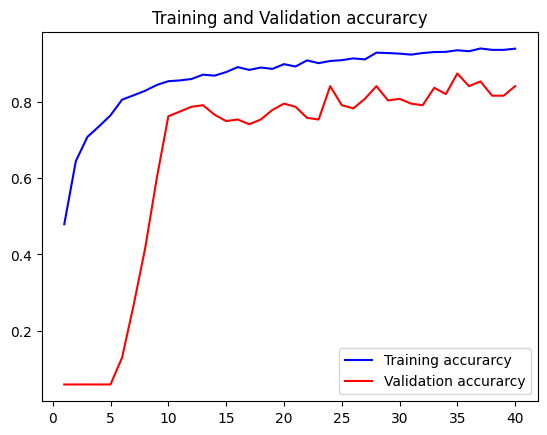

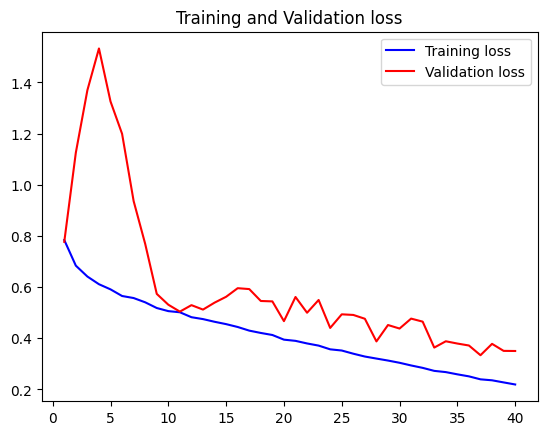

In [ ]:
#saves history attributes in variables to use them in the plot drawing
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1) #starts from 1 to the length of accuracy array+1 because it starts from 0 and will need 1 to make the index from 1-...
#Train and validation accuracy. calling methods to draw and passing the variables to it.
plt.plot(epochs, acc, 'b', label='Training accurarcy') #blue line
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy') #red line
plt.title('Training and Validation accurarcy')
plt.legend() #marks the dots

plt.figure() #draws the overall figure
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss') #blue line
plt.plot(epochs, val_loss, 'r', label='Validation loss') #red line
plt.title('Training and Validation loss')
plt.legend()
plt.show() #outputs the plot

In [ ]:
print("[INFO] Calculating model accuracy")
scores = model.evaluate(x_test, y_test) #test the model with the hidden testing images and classes/labels
print(f"Test Accuracy: {scores[1]*100}") #accuracy*100 for percentage

[INFO] Calculating model accuracy
8/8 [==============================] - 24s 3s/step - loss: 0.3262 - accuracy: 0.8250
Test Accuracy: 82.4999988079071


In [ ]:
from tensorflow.keras.models import load_model

model.save('my_model.h5') #save model

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
#doesn't work, comments below from the original code
#from tensorflow import keras
#model = keras.models.load_model('/kaggle/input/my-model/my_model.h5')

In [ ]:
#enables us to predict the labels of the data values on the basis of the trained model. accepts only a single argument which is usually the data to be tested.
predicted = model.predict(x_test)
predicted

8/8 [==============================] - 18s 2s/step


array([[1.41563960e-05, 2.03774849e-04, 1.08371387e-04, ...,
        1.81060735e-04, 1.69544073e-04, 1.70884741e-04],
       [3.61544488e-04, 1.02994335e-03, 6.54482424e-01, ...,
        3.81356478e-03, 6.14158576e-04, 4.91793326e-04],
       [1.10457651e-03, 1.39947911e-03, 7.99617078e-03, ...,
        1.22939855e-01, 1.51048857e-03, 2.57550865e-01],
       ...,
       [9.47564338e-09, 1.68532754e-09, 1.40379495e-08, ...,
        2.27078321e-08, 9.99999464e-01, 1.91832925e-07],
       [3.96975130e-03, 5.66712767e-03, 3.97212198e-03, ...,
        2.60378476e-02, 5.46541670e-03, 5.46374125e-03],
       [1.25998121e-25, 9.98005557e-26, 8.20686451e-26, ...,
        2.84725366e-25, 2.80740213e-25, 4.50949686e-26]], dtype=float32)

In [ ]:
truth = y_test #labels/classes to be compared against to see if model got it right. saved to the truth variable.
truth

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
predicted_temp = predicted
predicted[0] #tensor/array of arrays. for index 0. showcasing how close the plant in an image is to the plants the model knows.

array([1.4156396e-05, 2.0377485e-04, 1.0837139e-04, 1.4456492e-05,
       5.5099576e-05, 1.6951337e-04, 1.5965973e-03, 6.5875465e-05,
       9.9725074e-01, 1.8106074e-04, 1.6954407e-04, 1.7088474e-04],
      dtype=float32)

In [ ]:
len(predicted) #indices/number of arrays

240

In [ ]:
#for loop.
for i in range(0,240): #all arrays within the array
    for j in range(0,12): #all images within each inner array
        if(predicted[i][j] >= 0.5): #if positive or negative
            predicted_temp[i][j] = 1
        else:
            predicted_temp[i][j] = 0

predicted_temp
#1 belongs to the class, 0 doesn't belong to the class

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
predictions = label_binarizer.inverse_transform(predicted_temp) #returns the pictures from binary numbers to normal

In [ ]:
truths = label_binarizer.inverse_transform(truth) #erturns the labels from numbers back into classes to be checked

In [ ]:
predictions.shape #returns the dimentions of the array

(240,)

In [ ]:
truths.shape #same

(240,)

In [ ]:
# Source code credit for this function: https://gist.github.com/shaypal5/94c53d765083101efc0240d776a23823
#find the issues and mistakes of the model
def print_confusion_matrix(confusion_matrix, class_names, figsize = (20,20), fontsize=14):

    """Prints a confusion matrix, as returned by sklearn.metrics.confusion_matrix, as a heatmap.

    Arguments
    ---------
    confusion_matrix: numpy.ndarray
        The numpy.ndarray object returned from a call to sklearn.metrics.confusion_matrix.
        Similarly constructed ndarrays can also be used.
    class_names: list
        An ordered list of class names, in the order they index the given confusion matrix.
    figsize: tuple
        A 2-long tuple, the first value determining the horizontal size of the ouputted figure,
        the second determining the vertical size. Defaults to (10,7).
    fontsize: int
        Font size for axes labels. Defaults to 14.

    Returns
    -------
    matplotlib.figure.Figure
        The resulting confusion matrix figure

        Here is a description of the four elements of a confusion matrix:

    True Positive (TP): The number of cases in which the model correctly predicted the positive class.
    False Positive (FP): The number of cases in which the model predicted the positive class, but it was actually negative.
    True Negative (TN): The number of cases in which the model correctly predicted the negative class.
    False Negative (FN): The number of cases in which the model predicted the negative class, but it was actually positive
    """

    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names,
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('Truth')
    plt.xlabel('Prediction')

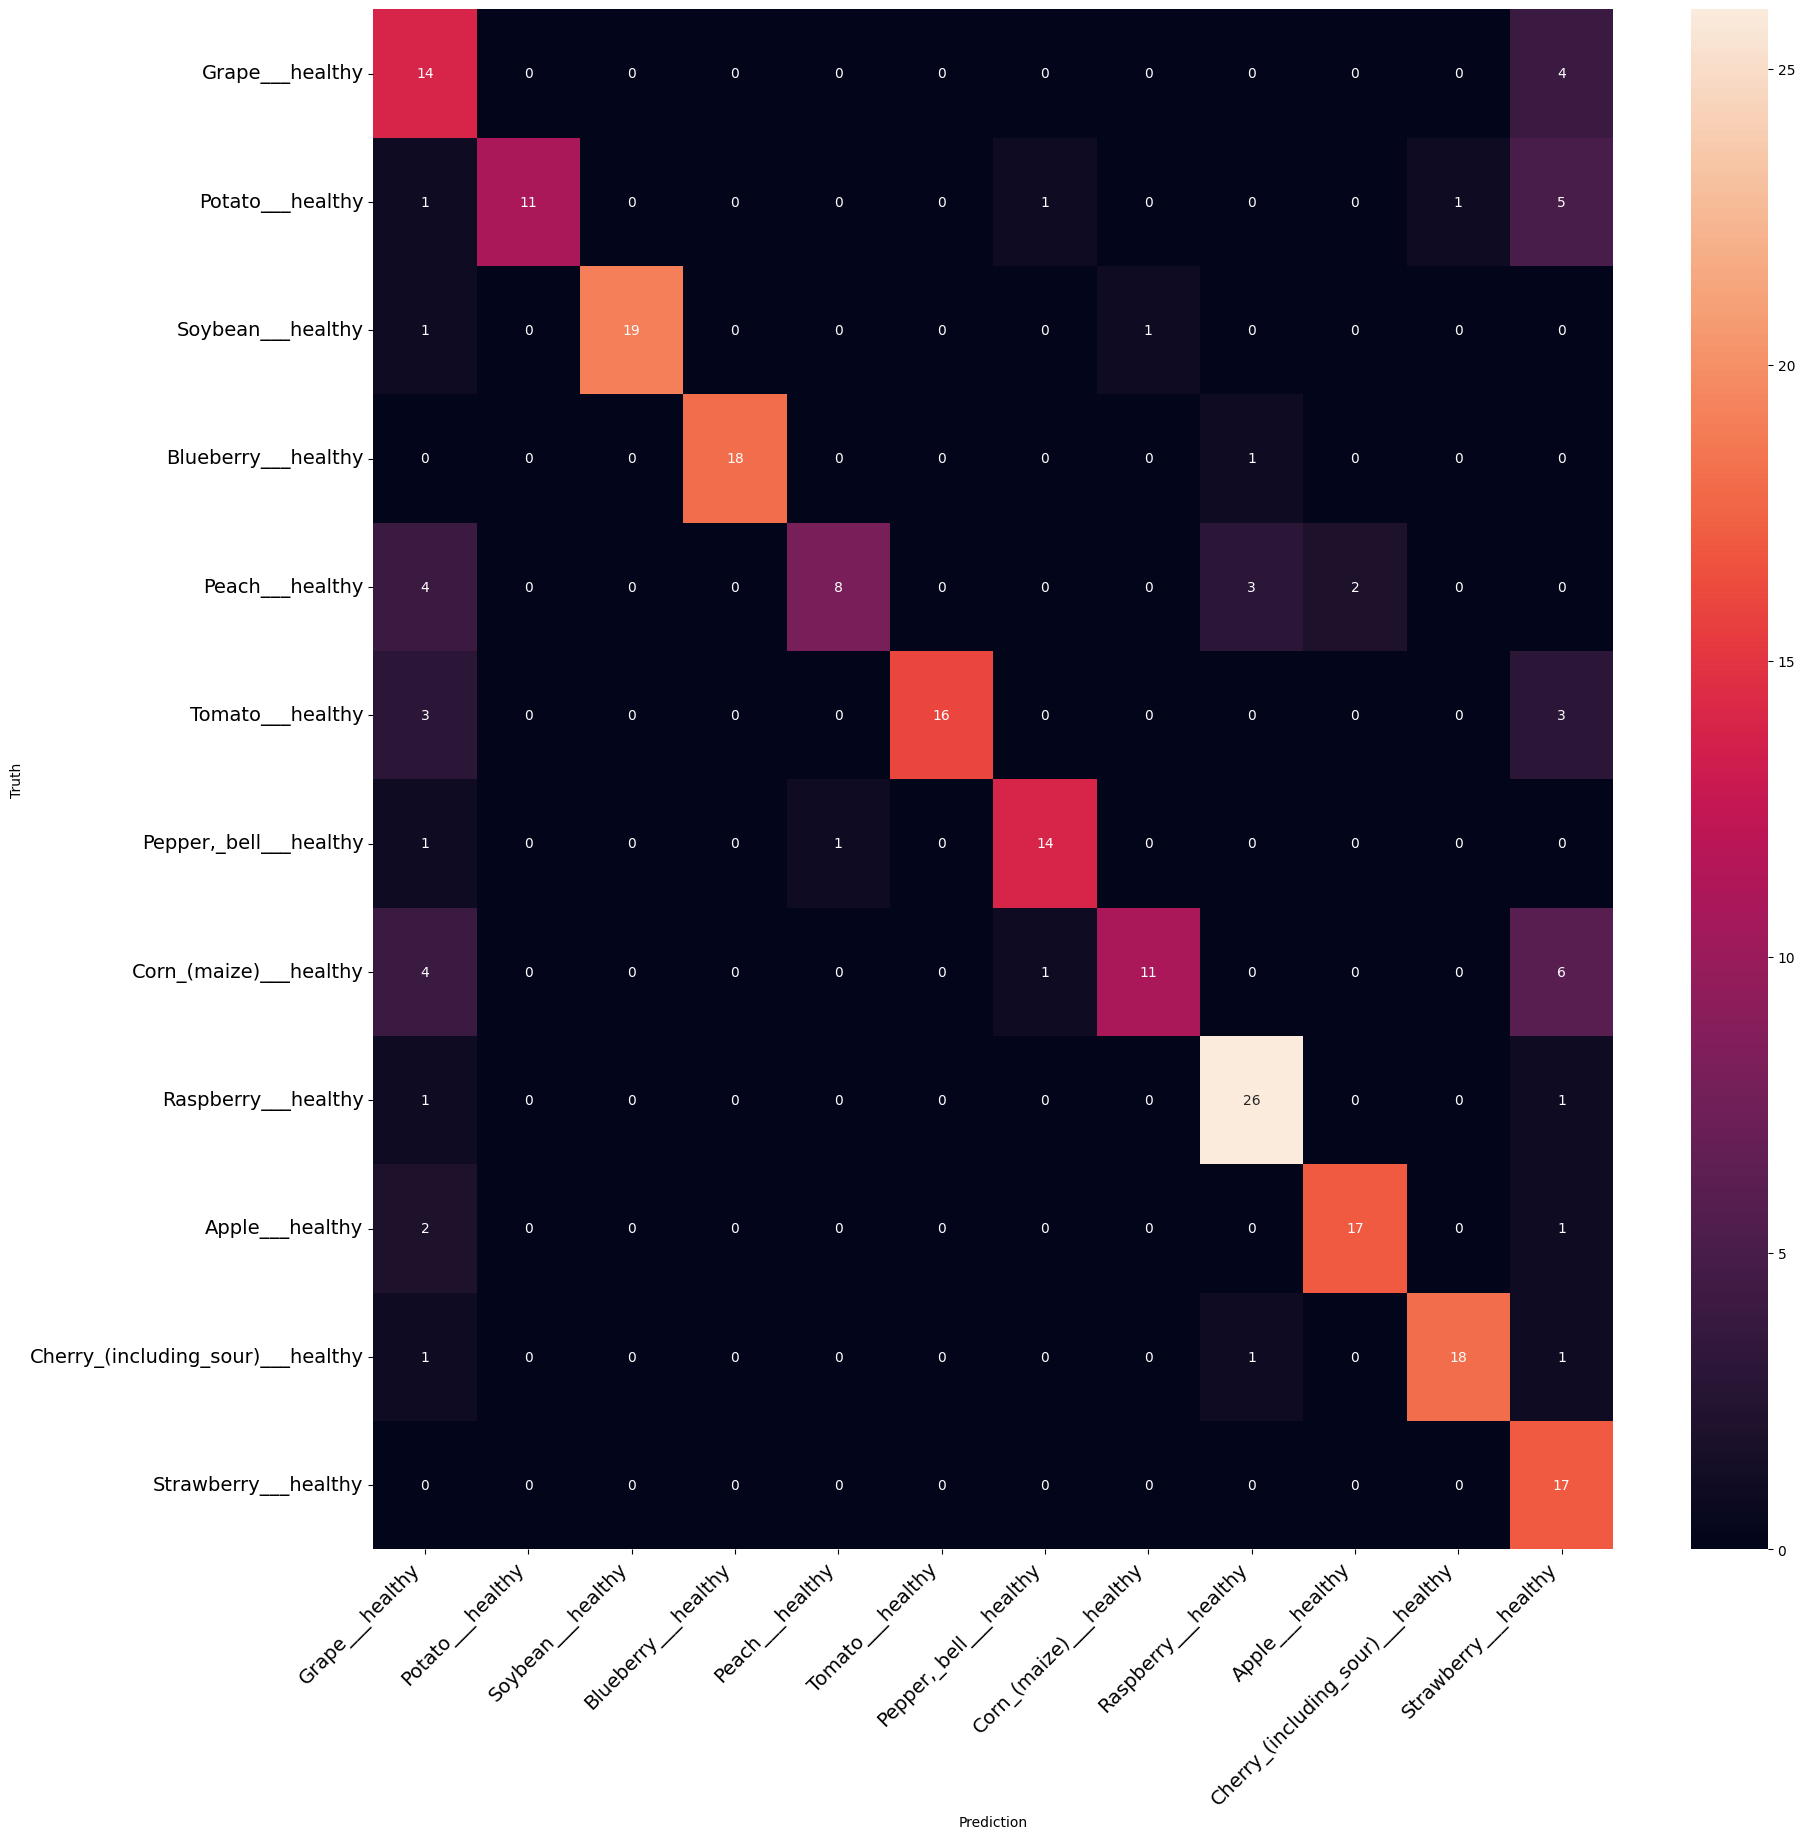

In [ ]:
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix , classification_report
import pandas as pd
import seaborn as sns

cm = confusion_matrix(truths,predictions)
print_confusion_matrix(cm,leaf_classs)

In [ ]:
leaf_classs #array with labels as strings

['Grape___healthy',
 'Potato___healthy',
 'Soybean___healthy',
 'Blueberry___healthy',
 'Peach___healthy',
 'Tomato___healthy',
 'Pepper,_bell___healthy',
 'Corn_(maize)___healthy',
 'Raspberry___healthy',
 'Apple___healthy',
 'Cherry_(including_sour)___healthy',
 'Strawberry___healthy']

In [ ]:
print(classification_report(truths, predictions)) #measuring the model performance

"""
Precision: Percentage of correct positive predictions relative to total positive predictions.

Recall: Percentage of correct positive predictions relative to total actual (truth) positives.

F1 Score: A weighted harmonic mean of precision and recall. The closer to 1, the better the model.

    F1 Score: 2 * (Precision * Recall) / (Precision + Recall)

Support: These values simply tell us how many players belonged to each class in the test dataset.

macro average (averaging the unweighted mean per label), weighted average (averaging the support-weighted mean per label). macro-averaging shows how well the model performs on each label independently.
weighted averaging accounts for class frequency by adjusting the influence of each class on the overall metric.

                                   precision    recall  f1-score   support

                  Apple___healthy       0.44      0.78      0.56        18
              Blueberry___healthy       1.00      0.58      0.73        19
Cherry_(including_sour)___healthy       1.00      0.90      0.95        21
           Corn_(maize)___healthy       1.00      0.95      0.97        19
                  Grape___healthy       0.89      0.47      0.62        17
                  Peach___healthy       1.00      0.73      0.84        22
           Pepper,_bell___healthy       0.88      0.88      0.88        16
                 Potato___healthy       0.92      0.50      0.65        22
              Raspberry___healthy       0.84      0.93      0.88        28
                Soybean___healthy       0.89      0.85      0.87        20
             Strawberry___healthy       0.95      0.86      0.90        21
                 Tomato___healthy       0.45      1.00      0.62        17

                       